<a href="https://colab.research.google.com/github/mathiasadikpon/AI/blob/main/MidtermProject_Part_2_Mathias_Adikpon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence Midterm Project

In this project, you will build a regression model and a classification model from scratch. Please follow the instructions closely, and only use Python's Numpy, Pandas, and matplotlib library to complete this project. Using functions from `sklearn` is not allowed.

**Part I** dues on Monday, March 22nd at 11:59 PM.
**Part II** dues on Monday, April 12th at 11:59 PM.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part I: A Regression Model

In this part, please build a multilinear regression model that extracts the relationship between housing prices and other relevant variables. The training data is shown in the table below:


In [ ]:
data1 = pd.DataFrame({
    "YearBuilt": [1974, 1996, 1968, 1962, 1960],
    "YearSold": [2015, 2017, 2020, 2010, 2016],
    "Bedrooms": [3, 10, 4, 5, 6],
    "TotalArea": [1500, 4000, 1700, 2500, 2000],
    "Quality": [7.5, 6, 4, 5.5, 5],
    "Price": [358500, 452600, 352100, 341300, 342200]
})

data1

,YearBuilt,YearSold,Bedrooms,TotalArea,Quality,Price
0,1974,2015,3,1500,7.5,358500
1,1996,2017,10,4000,6.0,452600
2,1968,2020,4,1700,4.0,352100
3,1962,2010,5,2500,5.5,341300
4,1960,2016,6,2000,5.0,342200


### Task 1: Data Transformation (10 pts)
Create a new column named "Age" that represents the age of each house when it was sold.

In [ ]:
# Your Code Here
data1['Age'] = data1['YearSold'] - data1['YearBuilt']
data1


,YearBuilt,YearSold,Bedrooms,TotalArea,Quality,Price,Age
0,1974,2015,3,1500,7.5,358500,41
1,1996,2017,10,4000,6.0,452600,21
2,1968,2020,4,1700,4.0,352100,52
3,1962,2010,5,2500,5.5,341300,48
4,1960,2016,6,2000,5.0,342200,56


### Task 2: Train a Multilinear Model (20 pts)
Assume that the price can be expressed as a linear combination of age, bedrooms, total area, and quality:

$Price = \theta_0 + \theta_1 \cdot Age + \theta_2 \cdot Bedrooms + \theta_3 \cdot TotalArea + \theta_4 \cdot Quality.$

Apply the normal equation to find the best values for the parameters:
1. Construct matrix $\textbf{X}$ and $\textbf{y}$ (the matrices are defined in Week 6 notebook and Chapter 4 of the textbook).
2. Calculate the parameter vector using the normal equation
$\theta = \big(\textbf{X}^T\cdot\textbf{X}\big)^{-1}\cdot\textbf{X}^T\cdot\textbf{y}$

In [ ]:
# 1.Construct matrix  X  and  y  (the matrices are defined in Week 6 notebook and Chapter 4 of the textbook).

# Construct matrix X using np.hstack(), np.ones()
#  Construct a column of ones
input_col = ['Age','Bedrooms', 'TotalArea', 'Quality']
X = np.hstack([np.ones([len(data1), 1]), data1[input_col].values])

# Construct vector y
y = data1[['Price']].values

In [ ]:
# 2. Calculate the parameter vector using the normal equation  θ=(XT⋅X)−1⋅XT⋅y
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)

[[ 5.92376387e+05]
 [-3.83925328e+03]
 [ 1.17271948e+04]
 [-3.11089808e+01]
 [-8.66468214e+03]]


### Task 3: Make A Prediction (10 pts)
Suppose that there is another house with the following attribute:
- YearBuilt: 1985
- YearSold: 2021
- Bedrooms: 6
- Total Area: 2500
- Quality: 5.5

Use the parameter values that you have calculated to make a prediction on its sale price.

In [ ]:
# Let's use the vector form to get the prediction.
# prediction = inner-product of the parameter vector and the feature vector.
#parameter_vector = np.array([592376.387,-3839.25328,11727.1948,-31.1089808, -8664.68214])
parameter_vector = np.array([theta[0][0],theta[1][0], theta[2][0], theta[3][0], theta[4][0]])

feature_vector = np.array([1, 2021 - 1985, 6, 2500, 5.5])
prediction = parameter_vector.dot(feature_vector)
print(prediction)


399098.23410694493


## Part II: A Classification Model

In this part, we will build a logistic regression model and evaluate its performance on the classifying the data. The dataset is as follows:


In [ ]:
data2 = pd.DataFrame([[5.0, 2.0, 1],
                      [6.2, 3.4, 1],
                      [4.9, 3.6, 0],
                      [6.2, 2.2, 1],
                      [5.7, 3.0, 1],
                      [4.8, 3.4, 0],
                      [5.0, 3.4, 0]],
                     columns=["x1", "x2", "class"])
data2

,x1,x2,class
0,5.0,2.0,1
1,6.2,3.4,1
2,4.9,3.6,0
3,6.2,2.2,1
4,5.7,3.0,1
5,4.8,3.4,0
6,5.0,3.4,0


### Task 1: Data Visualization (10 pts)
Visualize the data as a scatter plot. Show class 0 records as green dots and class 1 records as blue dots. Display the following items:
- Title of the plot: Distribution of the training data
- Label for x axis: x1
- Label for y axis: x2
- Legend

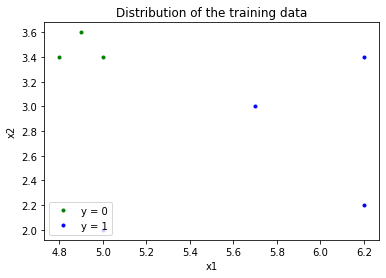

In [ ]:
# Your Code Here

green_pts = data2[data2['class'] == 0]
blue_pts = data2[data2['class'] == 1]
plt.plot(green_pts['x1'], green_pts['x2'], 'g.', label='y = 0')
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b.', label='y = 1')
plt.title('Distribution of the training data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.show()

### Task 2: Apply A Logistic Regression Model (10 pts)

Suppose that you are given a logistic regression model with explicity paramter values:

$p = \sigma(\textbf{x}\cdot\theta^T).$

where
- p: the probability that the point belongs to class 1.
- $\textbf{x} = (1, x_1, x_2)$.
- $\theta = (\theta_0, \theta_1, \theta_2) = (-2.15, 0.92, -0.82)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$

Find the model's prediction on the following test set:

In [ ]:
data3 = pd.DataFrame([[5.1, 3.4, 0],
                      [6.5, 2.8, 1],
                      [5.8, 2.7, 1],
                      [4.6, 3.1, 0]],
                     columns=["x1", "x2", "class"])
data3

,x1,x2,class
0,5.1,3.4,0
1,6.5,2.8,1
2,5.8,2.7,1
3,4.6,3.1,0


In [ ]:
theta = np.array([-2.15,0.92,-0.82]) 

# Now calculate p for input x and find prediction
input_col = ['x1', 'x2']
list_p = []
List_prediction = []

for i in data3.index:
    # print(i)
    x = np.array([1, data3.loc[i, 'x1'], data3.loc[i, 'x2']])
    t = x.dot(theta.T)
    p = 1 / (1 + np.e ** (-t))
    list_p.append(p)
    if p >= 0.5:
     List_prediction.append(1)
    else:
      List_prediction.append(0)


print("list_p: ", list_p)
print("List_prediction: ", List_prediction)

list_p:  [0.4388082790527956, 0.8225908083256755, 0.7255179606769018, 0.38698582386066455]
List_prediction:  [0, 1, 1, 0]


### Task 3: Model Evaluation (40 pts)
Calculate the following model metrics regarding the performance on the test set:
- classification accuracy
- precision score
- recall score
- F-1 score

In [ ]:
# Classification Accuracy

array1 = np.array(data3['class'])
array2 = List_prediction

# Count the number of pairs that have identical values
count = 0
for i in range(len(array1)):
    actual = array1[i]
    pred = array2[i]
    if actual == pred:
        count = count + 1

accuracy = count / len(array1)
print('Accuracy: ',accuracy)

Accuracy:  1.0


In [ ]:
# Precision Score
num_true_positives = 0
for i in range(len(array1)):
    label = array1[i]
    pred = array2[i]
    if label == 1 and pred == 1 :
        num_true_positives = num_true_positives + 1
print('num_true_positives: ', num_true_positives)

num_false_positives = 0
for i in range(len(array1)):
    label = array1[i]
    pred = array2[i]
    if label == 0 and pred == 1:
        num_false_positives = num_false_positives + 1
print('num_false_positives: ', num_false_positives)

precision = num_true_positives / (num_true_positives + num_false_positives)
print('Precision: ',precision)


num_true_positives:  2
num_false_positives:  0
Precision:  1.0


In [ ]:
# Recall Score
# Use a for loop to find the number of false negatives
num_false_negatives = 0
for i in range(len(array1)):
    label = array1[i]
    pred = array2[i]
    if label == 1 and pred == 0:
        num_false_negatives = num_false_negatives + 1
print('num_false_negatives: ', num_false_negatives)
# Calculate recall: num_true_positives / (num_true_positives + num_false_negatives)
recall = num_true_positives / (num_true_positives + num_false_negatives)
print('Recall: ', recall)


num_false_negatives:  0
Recall:  1.0


In [ ]:
# F-1 Score

f1 = 2 / (1 / precision + 1 / recall)
print('F-1: ', f1)

F-1:  1.0
